# Homework 1
This homework consists of 2 parts:
* Numpy (5 points)
* Matplotlib (5 points)


The score for each task is described in the comments before the task.

The task is performed independently, otherwise all those involved will receive 0 points :) If you have found a solution to any of the tasks (or part of it) in an open source, you must specify a link to this source in a separate block at the end of your work. Otherwise, **the work will also be rated at 0 points**.

## Part 1. Numpy
It is forbidden to use **while**, **for**, **if** in this part. All operations must be performed in numpy calculation. Recall that using, for example, max instead of np.max is also a suboptimal step. The solution will be counted if it satisfies the conditions above and passes asserts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

### Task 1 (1 point)

In [2]:
"""
description: finds the maximum element in the vector among the elements preceded by zero
input: np.array([8, 6, 0, 3])
output: 3
"""
def max_after_zero(x: np.array):
    try:
        array_to_search = x[1:][x[: len(x) - 1] == 0]
        return np.max(array_to_search)
    except ValueError:
        return None

In [3]:
assert max_after_zero(np.array([0, 1, 2, 0, 6, 0, 10, 0])) == 10
assert max_after_zero(np.array([8, 1, 2, 0, 4, 0, 5])) == 5
assert max_after_zero(np.array([-8, -1, -2, 0, -4, 0, -5])) == -4
print("OK")

OK


### Task 2 (1 point)

In [4]:
"""
description: makes up a block matrix of four
blocks, where each block is a given matrix
"""
def block_matrix(block: np.array):
    first_conc = np.concatenate((block, block), axis=1)
    final_conc = np.concatenate((first_conc, first_conc), axis=0)
    return final_conc

In [5]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)
print("OK")

OK


### Task 3 (1 point)

In [6]:
"""
description: calculates the product of all
nonzero diagonal elements of a square matrix
"""
def diag_prod(matrix: np.array):
    try:
        assert matrix.shape[0] == matrix.shape[1]
        x = np.arange(matrix.shape[0])
        diag_elements = matrix[x, x]
        answer = np.prod(diag_elements[diag_elements != 0])
        return answer
    except AssertionError:
        return None

In [7]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750
print("OK")

OK


### Task 4 (1 points)

In [8]:
"""
description: this class implements StandardScaler from the sklearn library:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
As input, the fit method accepts a matrix where the features are arranged in
columns, the fit method must remember mean (u) and standard deviation (s) for each of the features,
and the transform must normalize the matrix with the pre-calculated mean and standard deviation.
The transformation : z = (x - u) / s, where x - initial feature value
"""
class StandardScaler:
    def fit(self, X: np.array):
        mean_array = np.mean(X, axis=0)
        std_array = np.std(X, axis=0)
        self.mean = mean_array
        self.std = std_array

    def transform(self, X: np.array):
        try:
            mean_values, std_values = self.mean, self.std
        except AttributeError:
            return None
        transform_mean = X - mean_values
        transform_std = transform_mean / std_values
        return transform_std

In [9]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
scaler = StandardScaler()

scaler.fit(matrix)

assert np.allclose(
    scaler.transform(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)
print("OK")

OK


### Task 5 (1 point)

In [10]:

"""
description: calculates the antiderivative polynomial (take 42 as a constant)
for example, an array of coefficients [6, 0, 1] corresponds to 6x^2 + 1
"""
def antiderivative(coefs: np.array):
    to_divide = np.sort(-1 * np.arange(1, len(coefs) + 1)) * -1
    answer = np.concatenate((coefs / to_divide, np.array([42])))
    return answer

In [11]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 42.])
)
print("OK")

OK


In [12]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 42.])
)
print("OK")

OK


## Part 2. Matplotlib

Graphs should be readable without having to look into the code:
*   Graph should have a title
*   Subgraphs should have  titles
*   Axes should be labeled
*   Labels should not overlap
*   Font should be readable
*   The colors should be easily distinguishable



### Task 1 (2.5 points)
Generate a Gaussian vector of dimension 2 from 100 points (choose $\mu$ and $\sigma$ on your choice).

In [13]:
import matplotlib.pyplot as plt

Check [the three sigma rule](https://en.wikipedia.org/wiki/68-95-99.7_rule): 99.7% of the values of normal distribution $\in [\mu - 3\sigma; \mu + 3\sigma]$.

Let's visually check this rule for generated 2D data. Draw:



*   The generated data;
*   Point $\mu$ in a separate color;
*   A circle centered in $\mu$ with a radius such that 0.99 of all points fall there;
*   A circle with a radius of 3 sigma;



In [14]:
mean = np.array([10, 10])
covariance_matrix = np.array([[40, 0], [0, 40]])
sample = np.random.multivariate_normal(mean, covariance_matrix, size=100)
X, Y = sample[:, 0], sample[:, 1]
distances = np.linalg.norm(sample - mean, axis=1)
circle_99 = np.percentile(distances, 99)
std = np.sqrt(covariance_matrix[0][0])



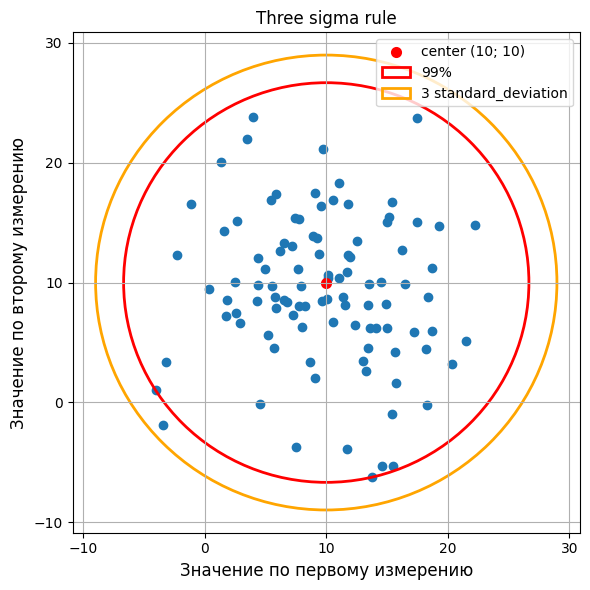

In [15]:
plt.figure(figsize=(6, 6))
plt.title("Three sigma rule")
plt.scatter(X, Y)
plt.xticks(np.linspace(-20, 40, 7))
plt.yticks(np.linspace(-20, 40, 7))
plt.xlabel("Значение по первому измерению", fontsize=12)
plt.ylabel("Значение по второму измерению", fontsize=12)
plt.scatter(mean[0], mean[1], color="red", linewidth=2, label="center (10; 10)")
c1 = plt.Circle(
    tuple(mean), circle_99, linewidth=2, fill=False, color="red", label="99%"
)
c2 = plt.Circle(
    tuple(mean), 3 * std, linewidth=2, fill=False, color="orange", label="3 standard_deviation"
)
ax = plt.gca()
ax.add_patch(c1)
ax.add_patch(c2)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

Possible reference picture:

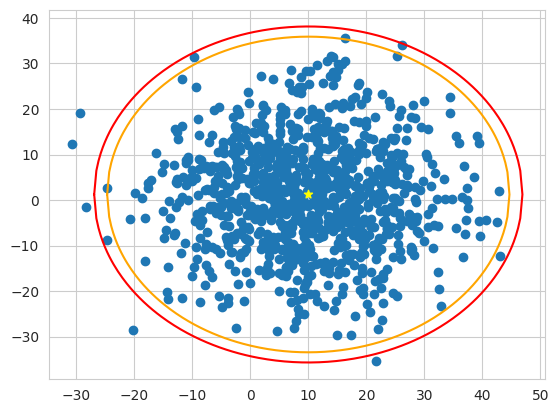

Draw histograms with 10 buckets for each dimension.

**Hint** use `plt.hist2d`

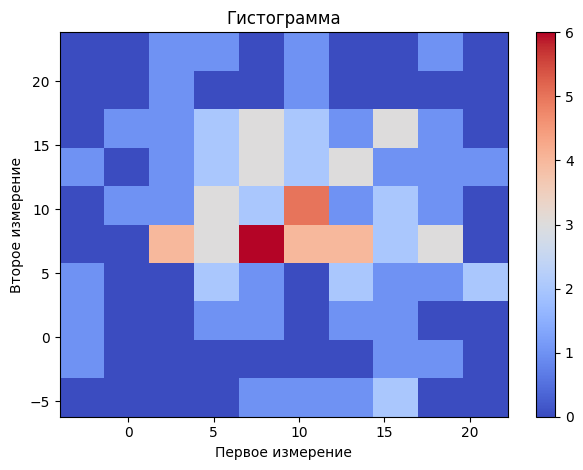

In [16]:
plt.hist2d(X, Y, bins=10, cmap="coolwarm")
plt.colorbar()
plt.title("Гистограмма")
plt.xlabel("Первое измерение")
plt.ylabel("Второе измерение")
plt.tight_layout()
plt.show()

### Task 2 (2.5 points)

Upload the dataset  [fischer's irises](https://ru.wikipedia.org/wiki/Ирисы_Фишера).

In [17]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.colors as pltcolors

iris = load_iris(as_frame=True)
X, y = iris.data, iris.target
X.sample(3)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
71,6.1,2.8,4.0,1.3
110,6.5,3.2,5.1,2.0
96,5.7,2.9,4.2,1.3


Compute correlation between features

In [18]:
correlation_matrix = X.corr()

To make investigating correlation more convenient build a **heatmap** using matplotlib.

Rows and columns should be signed with feature names.  The positive correlation should be displayed in green, the reverse in red, and the absence of correlation in white. Make the plot big enough.

**Hint:** use `plt.xticks`, `plt.yticks`, `plt.imshow`, `plt.colorbar`

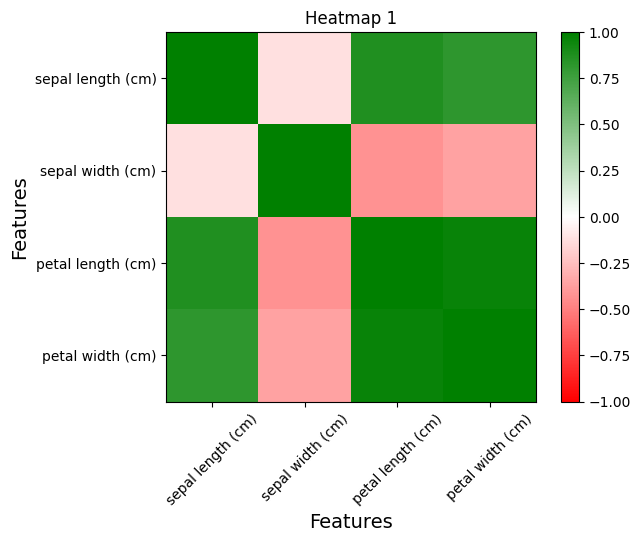

In [19]:
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title("Heatmap 1")

colors = ['red', 'white', 'green']
cmap = pltcolors.LinearSegmentedColormap.from_list("cmap", colors, N=256)

plt.imshow(correlation_matrix, cmap=cmap, vmin=-1, vmax=1)
plt.colorbar()


Build the same heatmap using seaborn.heatmap

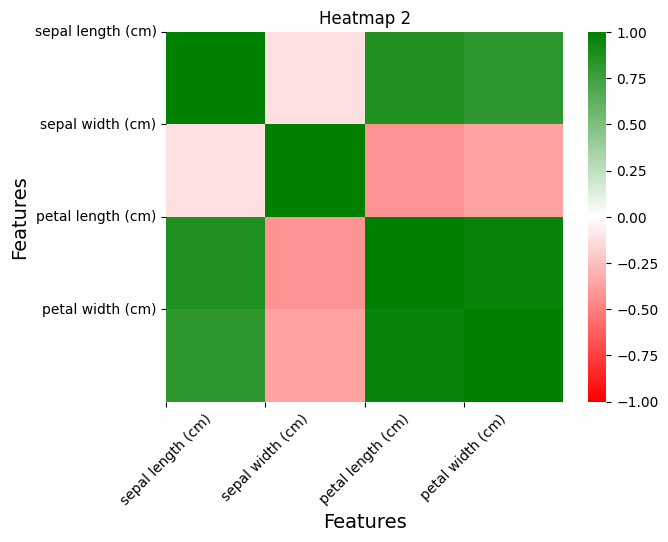

In [20]:
import seaborn as sns

sns.heatmap(correlation_matrix, cmap=cmap, vmin=-1, vmax=1)
plt.title("Heatmap 2")
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()